In [382]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp

### Normalisation function

- Normalising values to ensures that all values in same range

In [383]:
def normal(matrix):
    var1=matrix.mean()
    c1=matrix.max()
    c2=matrix.min()
    var2=c1-c2
    nor_mat=(matrix-var1)/var2
    return nor_mat,var1,var2



### Cost function

In [384]:
def cost(matrix,array,features):
    value=0
    sqoferr=(matrix.dot(features)-array)**2
    for i in range(matrix.shape[0]):
        value=value + sqoferr[i,0]  
    return value


### Gradient descent


In [385]:
def gradientdescent(matrix,array,features,epoch,alpha):
    cost1=np.zeros((epoch,1))
    for i in range(epoch):
        error=(matrix@(features))-array
        error_2=matrix.T@error
        features=features-alpha/(matrix.shape[0])*error_2
        cost1[i]=cost(matrix,array,features)

    return cost1,features



#### splitting and stacking functions:

In [386]:
def split(matrix,rat):
    m=matrix.shape[0]
    n=int(m*rat)
    train_data=matrix[0:n]
    test_data=matrix[n:m]
    return train_data,test_data

def stack(matrix):
    ones=np.ones((matrix.shape[0],1))
    mat_stac=np.hstack((ones,matrix))
    return mat_stac

### Function for Importing data

In [387]:
def dataimport(url,maggi):
    my_data=pd.read_csv(url, skipinitialspace=True, usecols=maggi).values
    price_data=pd.read_csv(url, skipinitialspace=True, usecols=['price']).values
    return my_data, price_data

In [388]:
def graph(cost,epoch):
    mp.plot(range(epoch),cost)
    mp.xlabel("iterations")
    mp.ylabel("cost")
    mp.title("cost vs iterations")
    return mp.show()


In [389]:
def predict(matrix,features):
    y_predict=matrix@features
    return y_predict

In [390]:
maggi=['carlength','carwidth','carheight','enginesize','stroke','horsepower']
url="https://raw.githubusercontent.com/lumidenoir/Project2022/assignment/Applications_Of_Reinforcement_Learning/Assignment-2/210299_krishna%20dantu/CarPrice_Assignment.csv"
my_data,price_data=dataimport(url,maggi)
theta=np.zeros((my_data.shape[1]+1,1))
sathwikprices=[[190.9,70.3,54.9,183,3.64,123]]
alpha=0.1
epoch=10000

In [391]:
my_data,fac1,fac2=normal(my_data)
price_data,fac3,fac4=normal(price_data)
my_data=stack(my_data)
train_data,test_data=split(my_data,0.8)
price_train,price_test=split(price_data,0.8)

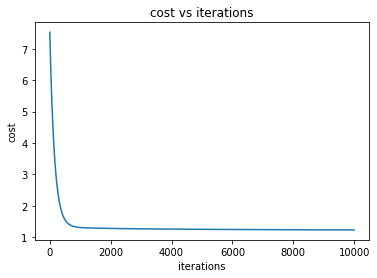

In [392]:
cost, theta = gradientdescent(train_data,price_train,theta,epoch,alpha)
graph(cost,epoch)

In [393]:
sathwikprices=(sathwikprices-fac1)/fac2
query=stack(sathwikprices)
q_pre=predict(query,theta)
price=q_pre[0,0]*fac4+fac3
print(price)

22087.928844835988
